In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import scale

In [2]:
bd = pd.read_csv('Dataset_Total.csv',sep=',')
print("Tamanho: " + str(bd.shape))
bd.head()

Tamanho: (1520, 19)


,Ano,Rodada,Mandante,Gols_Mandante,Gols_Visitante,Visitante,Vencedor,TC-Empates_Casa,TC-Jogos_Fora,TC-Derrotas_Fora,TC-Valor,TC-Pontos,TV-Vitorias_Casa,TV-Derrotas_Casa,TV-Gols_Casa,TV-Gols_Fora,TV-Gols_Sofridos,TV-Valor,TV-Pontos
0,2015,1,Chapecoense,2,1,Coritiba,1,0,0,0,8.20,0,0,0,0,0,0,17.55,0
1,2015,1,Palmeiras,2,2,Atletico-MG,0,0,0,0,61.95,0,0,0,0,0,0,53.93,0
2,2015,1,Fluminense,1,0,Joinville,1,0,0,0,66.35,0,0,0,0,0,0,25.67,0
3,2015,1,Gremio,3,3,Ponte Preta,0,0,0,0,39.48,0,0,0,0,0,0,9.10,0
4,2015,1,Cruzeiro,0,1,Corinthians,2,0,0,0,63.25,0,0,0,0,0,0,53.80,0


In [3]:
recursos = ['Rodada','TC-Empates_Casa', 'TC-Jogos_Fora',
       'TC-Derrotas_Fora', 'TC-Valor', 'TC-Pontos', 'TV-Vitorias_Casa',
       'TV-Derrotas_Casa', 'TV-Gols_Casa', 'TV-Gols_Fora', 'TV-Gols_Sofridos',
       'TV-Valor', 'TV-Pontos']
bd.columns

Index(['Ano', 'Rodada', 'Mandante', 'Gols_Mandante', 'Gols_Visitante',
       'Visitante', 'Vencedor', 'TC-Empates_Casa', 'TC-Jogos_Fora',
       'TC-Derrotas_Fora', 'TC-Valor', 'TC-Pontos', 'TV-Vitorias_Casa',
       'TV-Derrotas_Casa', 'TV-Gols_Casa', 'TV-Gols_Fora', 'TV-Gols_Sofridos',
       'TV-Valor', 'TV-Pontos'],
      dtype='object')

### Exploration

In [4]:
n_features = bd.shape[1]

n_rows = bd.shape[0]

n_vit_casa = len(bd[bd['Vencedor'] == 1])
n_vit_fora = len(bd[bd['Vencedor'] == 2])
n_empates = len(bd[bd['Vencedor'] == 0])

pct_vit_casa = float(n_vit_casa/n_rows)

print('Numero de jogos: ' + str(n_rows))
print('Numero de colunas: ' + str(n_features))
print('Numero de vitorias em casa: ' + str(n_vit_casa))
print('Numero de vitorias fora: ' + str(n_vit_fora))
print('Numero de empates: ' + str(n_empates))
print('Porcentagem de vitorias em casa: ' ,format(pct_vit_casa))

Numero de jogos: 1520
Numero de colunas: 19
Numero de vitorias em casa: 771
Numero de vitorias fora: 350
Numero de empates: 399
Porcentagem de vitorias em casa:  0.5072368421052632


In [5]:
bd.corr()

,Ano,Rodada,Gols_Mandante,Gols_Visitante,Vencedor,TC-Empates_Casa,TC-Jogos_Fora,TC-Derrotas_Fora,TC-Valor,TC-Pontos,TV-Vitorias_Casa,TV-Derrotas_Casa,TV-Gols_Casa,TV-Gols_Fora,TV-Gols_Sofridos,TV-Valor,TV-Pontos
Ano,1.000000,0.000000,-0.032717,-0.021630,-0.042377,0.079551,-0.000107,-0.034920,0.151753,-0.006020,-0.033743,-0.022455,-0.016431,-0.010643,-0.014331,0.153718,-0.009436
Rodada,0.000000,1.000000,-0.001668,-0.024507,-0.004321,0.746231,0.997236,0.830538,0.001678,0.900103,0.826829,0.651923,0.869214,0.818243,0.905213,-0.003953,0.895855
Gols_Mandante,-0.032717,-0.001668,1.000000,0.045580,-0.096213,-0.064400,-0.000431,-0.078742,0.137579,0.056898,-0.061708,0.062865,-0.037410,-0.021201,0.037704,-0.116922,-0.051196
Gols_Visitante,-0.021630,-0.024507,0.045580,1.000000,0.354365,-0.004858,-0.027646,-0.004670,-0.063746,-0.045956,0.003381,-0.006794,0.017471,0.041291,-0.034810,0.116309,0.016217
Vencedor,-0.042377,-0.004321,-0.096213,0.354365,1.000000,0.017017,-0.006806,-0.001415,-0.039850,-0.020228,-0.002187,-0.003749,0.005511,0.009125,-0.004050,0.062673,-0.001899
TC-Empates_Casa,0.079551,0.746231,-0.064400,-0.004858,0.017017,1.000000,0.741761,0.726439,-0.103587,0.560019,0.633124,0.465604,0.657454,0.608023,0.673178,0.005089,0.672178
TC-Jogos_Fora,-0.000107,0.997236,-0.000431,-0.027646,-0.006806,0.741761,1.000000,0.832636,0.003904,0.895871,0.825527,0.651248,0.867632,0.814882,0.901820,-0.003365,0.893942
TC-Derrotas_Fora,-0.034920,0.830538,-0.078742,-0.004670,-0.001415,0.726439,0.832636,1.000000,-0.192634,0.565941,0.720081,0.491563,0.734955,0.672333,0.740555,-0.004308,0.756799
TC-Valor,0.151753,0.001678,0.137579,-0.063746,-0.039850,-0.103587,0.003904,-0.192634,1.000000,0.192494,-0.014821,0.021368,0.000855,0.018203,0.009092,0.005634,0.000507
TC-Pontos,-0.006020,0.900103,0.056898,-0.045956,-0.020228,0.560019,0.895871,0.565941,0.192494,1.000000,0.729460,0.611245,0.777414,0.735592,0.820394,-0.013456,0.801612


In [6]:
bd.describe()

,Ano,Rodada,Gols_Mandante,Gols_Visitante,Vencedor,TC-Empates_Casa,TC-Jogos_Fora,TC-Derrotas_Fora,TC-Valor,TC-Pontos,TV-Vitorias_Casa,TV-Derrotas_Casa,TV-Gols_Casa,TV-Gols_Fora,TV-Gols_Sofridos,TV-Valor,TV-Pontos
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,2016.500000,19.500000,1.427632,0.913816,0.967763,2.332237,9.489474,4.857237,44.505500,25.155263,4.842763,2.180263,13.536184,8.325658,21.650000,44.470105,25.474342
std,1.118402,10.969465,1.151477,0.966084,0.701461,1.890557,5.518288,3.312356,21.949788,16.721145,3.305731,2.044696,8.902441,6.166646,14.170127,21.978149,16.687520
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.750000,10.000000,1.000000,0.000000,0.000000,1.000000,5.000000,2.000000,27.150000,11.000000,2.000000,1.000000,6.000000,3.000000,10.000000,26.550000,12.000000
50%,2016.500000,19.500000,1.000000,1.000000,1.000000,2.000000,9.000000,4.000000,40.590000,24.000000,4.000000,2.000000,13.000000,8.000000,21.000000,39.480000,24.000000
75%,2017.250000,29.000000,2.000000,1.000000,1.000000,3.000000,14.000000,7.000000,59.775000,37.000000,7.000000,3.000000,20.000000,12.250000,32.000000,59.775000,37.000000
max,2018.000000,38.000000,6.000000,6.000000,2.000000,9.000000,19.000000,17.000000,92.050000,79.000000,16.000000,10.000000,44.000000,29.000000,64.000000,92.050000,79.000000


In [7]:
bd.groupby('Vencedor').mean()

,Ano,Rodada,Gols_Mandante,Gols_Visitante,TC-Empates_Casa,TC-Jogos_Fora,TC-Derrotas_Fora,TC-Valor,TC-Pontos,TV-Vitorias_Casa,TV-Derrotas_Casa,TV-Gols_Casa,TV-Gols_Fora,TV-Gols_Sofridos,TV-Valor,TV-Pontos
Vencedor,,,,,,,,,,,,,,,,
0,2016.581454,19.731830,0.907268,0.907268,2.355890,9.609023,5.095238,43.038922,24.982456,5.025063,2.172932,13.904762,8.596491,21.631579,45.168997,26.518797
1,2016.481193,19.325551,2.119326,0.447471,2.263294,9.417639,4.617380,47.232283,25.801556,4.664073,2.198444,13.086900,7.967575,21.748379,41.843113,24.437095
2,2016.448571,19.620000,0.497143,1.948571,2.457143,9.511429,5.114286,40.170686,23.928571,5.028571,2.148571,14.105714,8.805714,21.454286,49.460257,26.568571


In [8]:
#Agrupando o valor por faixa de valor
for i,linha in bd.iterrows():
    if bd.loc[i,'TC-Valor'] <= 10:
        bd.loc[i,'TC-ValorFaixa'] = 1
    elif bd.loc[i,'TC-Valor'] <= 20:
        bd.loc[i,'TC-ValorFaixa'] = 2
    elif bd.loc[i,'TC-Valor'] <= 30:
        bd.loc[i,'TC-ValorFaixa'] = 3
    elif bd.loc[i,'TC-Valor'] <= 40:
        bd.loc[i,'TC-ValorFaixa'] = 4
    elif bd.loc[i,'TC-Valor'] <= 50:
        bd.loc[i,'TC-ValorFaixa'] = 5
    elif bd.loc[i,'TC-Valor'] <= 60:
        bd.loc[i,'TC-ValorFaixa'] = 6
    elif bd.loc[i,'TC-Valor'] <= 70:
        bd.loc[i,'TC-ValorFaixa'] = 7
    elif bd.loc[i,'TC-Valor'] <= 80:
        bd.loc[i,'TC-ValorFaixa'] = 8
    elif bd.loc[i,'TC-Valor'] <= 90:
        bd.loc[i,'TC-ValorFaixa'] = 9
    elif bd.loc[i,'TC-Valor'] <= 100:
        bd.loc[i,'TC-ValorFaixa'] = 10
    elif bd.loc[i,'TC-Valor'] <= 110:
        bd.loc[i,'TC-ValorFaixa'] = 11
    elif bd.loc[i,'TC-Valor'] <= 120:
        bd.loc[i,'TC-ValorFaixa'] = 12
    else:
        bd.loc[i,'TC-ValorFaixa'] = 13

In [9]:
renda = {}
renda = bd['TC-ValorFaixa'].value_counts()

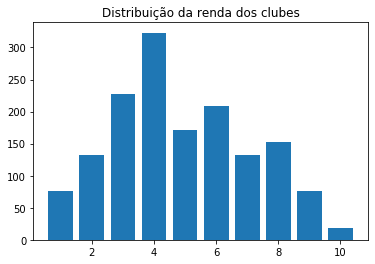

In [10]:
#Podemos ver q se trata de uma distribuição assimétrica enviesada positivamente
#Pode ser usada como métricas: raiz quadrada, raiz cúbida e log.
plt.bar(renda.index,renda)
plt.title('Distribuição da renda dos clubes')
plt.show()

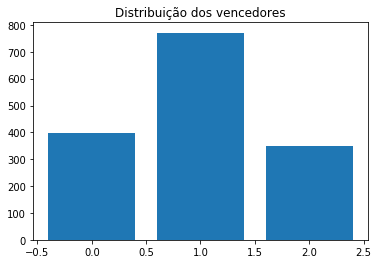

In [11]:
#Distribuição normal
vencedor = {}
vencedor = bd['Vencedor'].value_counts()

plt.bar(vencedor.index,vencedor)
plt.title('Distribuição dos vencedores')
plt.show()

In [12]:
X = pd.DataFrame(bd,columns=recursos)
y = pd.DataFrame(bd,columns=['Vencedor'])

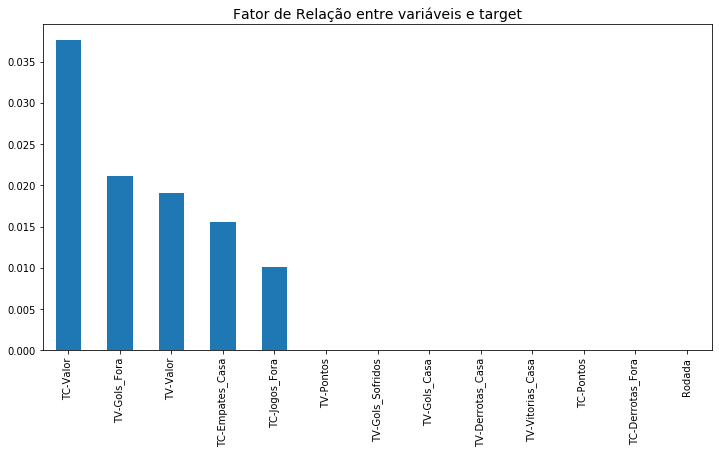

In [13]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest
mic = mutual_info_classif(X,y.values.reshape(-1,))

mutual = pd.Series(mic)
mutual.index = X.columns
mutual = mutual.sort_values(ascending=False)

mutual.plot.bar(figsize=(12,6))
plt.title('Fator de Relação entre variáveis e target',fontsize=14)
plt.show()

In [14]:
best = SelectKBest(mutual_info_classif,k=10).fit(X,y.values.reshape(-1,))
X.columns[best.get_support()]

Index(['Rodada', 'TC-Empates_Casa', 'TC-Jogos_Fora', 'TC-Valor',
       'TV-Derrotas_Casa', 'TV-Gols_Casa', 'TV-Gols_Fora', 'TV-Gols_Sofridos',
       'TV-Valor', 'TV-Pontos'],
      dtype='object')